# maxsmi
## Analysis of results

This notebook serves to analyse the results of the simulations ran on the Curta cluster.

## Prerequisites
This notebook will run under the condition that some simulations have been run, e.g.
```
(maxsmi) $ python maxsmi/full_workflow.py --task ESOL --aug-strategy-train augmentation_with_duplication --aug-nb-train 10 --aug-nb-test 10

```

Have a look at the [README](https://github.com/t-kimber/maxsmi/blob/main/README.md) page for more details.

In [1]:
#!pip install flake8 pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
from maxsmi.utils_analysis import retrieve_metric
import matplotlib.pyplot as plt

In [3]:
def plot_metric(metric, set_, max_augmentation=100):
    """
    Plots the metric of interest on the set of interest.

    Parameters
    ----------
    metric : str
        The metric of interest, such as the r2 score,
        time or mean squared error.
    set_ : str
        The train set or test set.
    augmentation_strategy : str
            The augmentation strategy used.
    max_augmentation : int, default is 100.
        The largest number of augmentation that was performed.

    Returns
    -------
    None
    """

    tasks = ["ESOL", "free_solv"]
    models = ["CONV1D", "CONV2D", "RNN"]

    x = [elem for elem in range(10, max_augmentation + 10, 10)]

    fig, ax = plt.subplots(nrows=len(tasks),
                           ncols=len(models),
                           figsize=(20, 10))

    for i, task in enumerate(tasks):
        for j, model in enumerate(models):
            legend_ = []
            for augmentation_strategy in [
                "augmentation_with_duplication",
                "augmentation_without_duplication",
                "augmentation_with_reduced_duplication"
            ]:
                y_task_model_strategy = []
                for augmentation_num in range(10, max_augmentation + 10, 10):
                    y = retrieve_metric(
                        metric,
                        set_,
                        task,
                        augmentation_strategy,
                        augmentation_num,
                        augmentation_strategy,
                        augmentation_num,
                        model,
                    )
                    y_task_model_strategy.append(y)
                ax[i, j].plot(x, y_task_model_strategy)
                ax[i, j].set_title(f"{task}:{model}")
                ax[i, j].set_xlabel("Number of augmentation")
                ax[i, j].set_ylabel(f"{metric}")
                if metric == "r2":
                    ax[i, j].set_ylim([0.82, 1])
                    ax[i, j].set_xlim([10-1, 100+1])
                caption = f"{augmentation_strategy}"
                legend_.append(caption)
                ax[i, j].legend(legend_)
    plt.show()

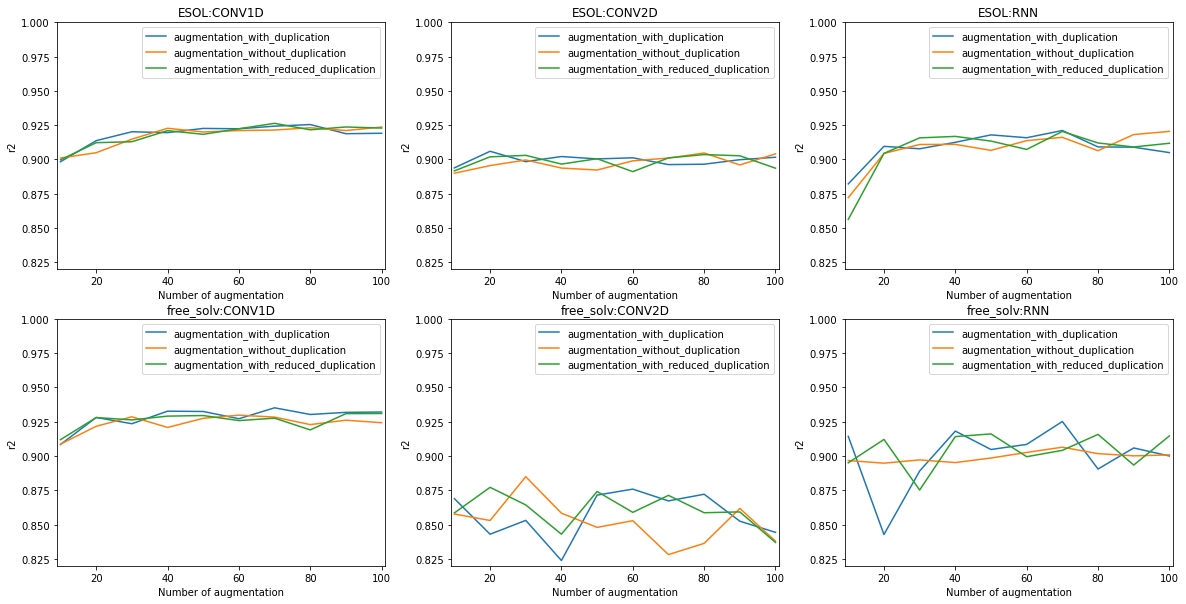

In [4]:
plot_metric("r2", "test")

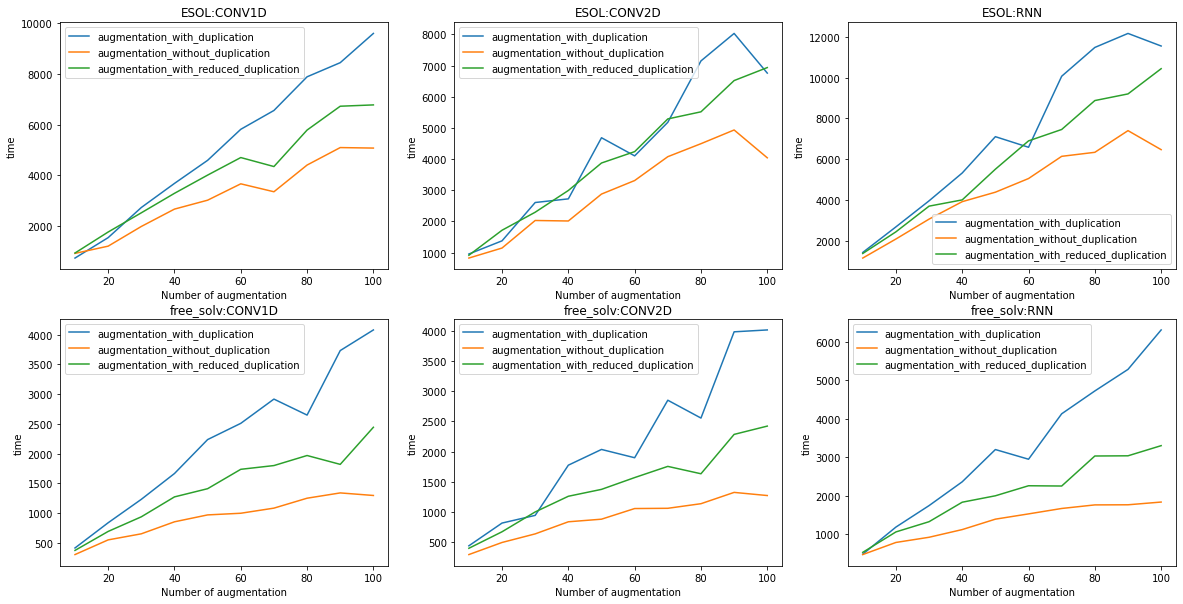

In [5]:
plot_metric("time", "train")